In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [14]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # 데이터프레임 컬럼 display

import warnings
warnings.filterwarnings('ignore') # 경고 무시

### Raw data 가져오기

In [15]:
df = pd.read_csv('./volleyball_raw.csv')
df.head()

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,19,메디 (L),O,O,O,O,O,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.2,17.89,24,20,4,0,4.0,20.17,7,0,1,0.0,3.72,28,11,2,1.8,28.28,20,3,5,6,1,0.6,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,7,고예림 (L),O,O,O,O,O,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.6,18.95,22,17,5,0,3.4,18.49,7,1,0,0.2,3.72,25,15,1,2.8,25.25,10,0,7,3,0,0.0,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,4,김희진 (R),O,O,O,O,O,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.2,13.68,12,11,1,0,2.2,10.08,7,0,1,0.0,3.72,0,0,0,0.0,0.00,14,4,6,3,0,0.8,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,17,김미연 (L),O,O,O,O,O,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.0,14.74,6,5,1,0,1.0,5.04,3,0,0,0.0,1.60,1,0,0,0.0,1.01,12,2,2,7,0,0.4,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,11,김수지 (C),O,O,O,O,O,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.2,14.74,11,10,1,0,2.0,9.24,7,0,0,0.0,3.72,0,0,0,0.0,0.00,28,1,13,9,0,0.2,29.79,2,0,3


### 데이터 전처리

In [16]:
# No. 열 삭제
df = df.drop('No.', axis = 1)

In [17]:
# 3경기 이상 출전한 선수만 유지 (출전 세트 결측치가 3개 이상인 선수 제거)
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

# thresh = 3 : 정상 값(Not NaN)이 3개 이상만 유지
df = df.dropna(subset = subset, thresh = 3)
df

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0


In [18]:
# 스타팅멤버 표시 (3세트 이상 스타팅멤버라면 1 아니면 0)
df['스타팅멤버'] = 0

df.loc[(df.iloc[:, 5:10] == 'O').sum(axis = 1) >= 3, '스타팅멤버'] = 1
df

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,1
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,1
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,1
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,1
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,1
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,0
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,0


In [19]:
# 출전 세트 열 삭제
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

df = df.drop(subset, axis = 1)
df

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버
0,1,IBK기업은행,2017-10-14,0,메디 (L),24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,1
1,1,IBK기업은행,2017-10-14,0,고예림 (L),15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,1
2,1,IBK기업은행,2017-10-14,0,김희진 (R),15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,1
3,1,IBK기업은행,2017-10-14,0,김미연 (L),7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,1
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,1
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,0
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,0


In [20]:
# 이름과 포지션 분리하기
# "이름" 열 : 이름 정보
# "포지션" 열 : 포지션 정보

df['포지션'] = df['이름'].str.split().str[1].str.strip('()')
df['이름'] = df['이름'].str.split().str[0]
df

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버,포지션
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,1,L
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,1,L
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,1,R
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,1,L
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,1,C
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,1,C
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,0,L
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,0,S


In [21]:
# 선수 별 득점 점유율 구하기 (개인 별 득점을 팀 전체의 득점으로 나누기)

tem = df.groupby(['경기번호'])['득점_득점'].sum()
tem = tem.reset_index()
df2 = pd.merge(df,tem,how='inner',on='경기번호')
df2.rename(columns={'득점_득점_x' : '득점_득점','득점_득점_y':'경기득점'},inplace=True)
df2['득점점유율'] = df2['득점_득점'] / df2['경기득점']
df['득점점유율'] = df2['득점점유율']

In [22]:
# 선수 별 득점 점유율 구하기 (개인 별 득점을 팀 전체의 득점으로 나누기)

# df_total_score = df['득점_득점'].sum()
# df['득점점유율'] = df['득점_득점'] / df_total_score
# df

In [23]:
# 컬럼 선택

columns = [
    '팀명', '경기날짜', '결과', '이름',
#     '득점_득점',
#     '공격종합_시도',
#     '공격종합_성공',
#     '공격종합_공격차단',
#     '공격종합_범실',
    '공격종합_성공률',
#     '공격종합_점유율',
#     '오픈_시도',
#     '오픈_성공',
#     '오픈_공격차단',
#     '오픈_범실',
    '오픈_성공률',
#     '오픈_점유율',
#     '시간차_시도',
#     '시간차_성공',
#     '시간차_공격차단',
#     '시간차_범실',
    '시간차_성공률',
#     '시간차_점유율',
#     '이동_시도',
#     '이동_성공',
#     '이동_공격차단',
#     '이동_범실',
    '이동_성공률',
#     '이동_점유율',
#     '후위_시도',
#     '후위_성공',
#     '후위_공격차단',
#     '후위_범실',
    '후위_성공률',
#     '후위_점유율',
#     '속공_시도',
#     '속공_성공',
#     '속공_공격차단',
#     '속공_범실',
    '속공_성공률',
#     '속공_점유율',
#     '퀵오픈_시도',
#     '퀵오픈_성공',
#     '퀵오픈_공격차단',
#     '퀵오픈_범실',
    '퀵오픈_성공률',
#     '퀵오픈_점유율',
#     '서브_시도',
#     '서브_성공',
#     '서브_범실',
    '서브_성공률',
#     '서브_점유율',
#     '디그_시도',
#     '디그_성공',
#     '디그_실패',
#     '디그_범실',
#     '디그_세트당',
#     '디그_점유율',
#     '세트_시도',
#     '세트_성공',
#     '세트_범실',
#     '세트_세트당',
#     '세트_점유율',
#     '리시브_시도',
#     '리시브_정확',
#     '리시브_실패',
#     '리시브_세트당',
#     '리시브_점유율',
#     '블로킹_시도',
#     '블로킹_성공',
#     '블로킹_유효블락',
#     '블로킹_실패',
#     '블로킹_범실',
#     '블로킹_세트당',
#     '블로킹_점유율',
#     '블로킹_어시스트',
#     '벌칙_벌칙',
    '범실_범실',
    '포지션',
    '득점점유율',
    '스타팅멤버'
]


df = df[columns]
df

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.20,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.60,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.20,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.00,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.20,3,C,0.039735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,KGC인삼공사,2022-02-28,0,한송이,28.57,0.00,0.00,0.00,0.00,66.67,0.00,0.00,0,C,NaN,1
10989,KGC인삼공사,2022-02-28,0,정호영,60.00,66.67,0.00,0.00,0.00,50.00,0.00,0.00,0,C,NaN,1
10990,KGC인삼공사,2022-02-28,0,고의정,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,1,L,NaN,0
10991,KGC인삼공사,2022-02-28,0,하효림,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0,S,NaN,0


Index(['팀명', '경기날짜', '결과', '이름', '공격종합_성공률', '오픈_성공률', '시간차_성공률', '이동_성공률',
       '후위_성공률', '속공_성공률', '퀵오픈_성공률', '서브_성공률', '범실_범실', '포지션', '득점점유율',
       '스타팅멤버'],
      dtype='object')

#### 전처리 함수화

### 데이터 변경

In [24]:
# 한 경기당 스타팅멤버의 수 확인
df.groupby(['경기날짜', '팀명'])['스타팅멤버'].sum().value_counts()

6    673
5    178
4     61
3     21
7     10
2      5
Name: 스타팅멤버, dtype: int64

In [25]:
# 경기날짜의 데이터타입 변경 (datetime64)
df['경기날짜'] = df['경기날짜'].astype('datetime64')
df.dtypes

팀명                  object
경기날짜        datetime64[ns]
결과                   int64
이름                  object
공격종합_성공률           float64
오픈_성공률             float64
시간차_성공률            float64
이동_성공률             float64
후위_성공률             float64
속공_성공률             float64
퀵오픈_성공률            float64
서브_성공률             float64
범실_범실                int64
포지션                 object
득점점유율              float64
스타팅멤버                int64
dtype: object

In [26]:
# 스타팅멤버만 선택
df_starting = df[df['스타팅멤버'] == 1]
df_starting

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.2,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.6,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.2,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.0,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.2,3,C,0.039735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10985,KGC인삼공사,2022-02-28,0,옐레나,43.90,35.29,0.00,0.00,50.00,0.00,50.00,0.0,2,R,NaN,1
10986,KGC인삼공사,2022-02-28,0,이소영,28.57,0.00,0.00,0.00,0.00,0.00,50.00,0.0,2,L,NaN,1
10987,KGC인삼공사,2022-02-28,0,박혜민,30.00,25.00,0.00,0.00,0.00,0.00,33.33,0.0,4,L,NaN,1
10988,KGC인삼공사,2022-02-28,0,한송이,28.57,0.00,0.00,0.00,0.00,66.67,0.00,0.0,0,C,NaN,1


In [27]:
## 경기 당 스타팅멤버가 5명 이상만 선택

# 스타팅멤버가 5명 미만이 포함된 날짜 선택
temp = (df_starting.groupby(['경기날짜', '팀명'])[['스타팅멤버']].sum() < 5).reset_index()
drop_dates = temp.loc[temp['스타팅멤버'], '경기날짜'].unique()

# drop_dates를 제외한 날짜만 선택
df_starting = df_starting[~df_starting['경기날짜'].isin(drop_dates)]

# 스타팅멤버 다시 확인
df_starting.groupby(['경기날짜', '팀명'])['스타팅멤버'].sum().value_counts()

6    613
5    151
7     10
Name: 스타팅멤버, dtype: int64

In [28]:
df_starting.head()

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.2,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.6,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.2,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.0,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.2,3,C,0.039735,1


In [29]:
# 데이터프레임 변경 (날짜, 팀 별 출전 선수 명단과 결과)
df_starting5 = df_starting.groupby(['경기날짜', '팀명'])[['이름', '결과']].agg({'이름' : lambda data : ' '.join(data).split(), '결과' : any})
df_starting5 = pd.DataFrame(df_starting5).reset_index()
df_starting5['이름'] = df_starting5['이름'].str[:5]
df_starting5.head()

,경기날짜,팀명,이름,결과
0,2017-10-14,IBK기업은행,"[메디, 고예림, 김희진, 김미연, 김수지]",False
1,2017-10-14,흥국생명,"[심슨, 이재영, 정시영, 김나희, 조송화]",True
2,2017-10-15,KGC인삼공사,"[알레나, 한송이, 유희옥, 최수빈, 이재은]",False
3,2017-10-15,현대건설,"[엘리자베스, 황연주, 양효진, 김세영, 황민경]",True
4,2017-10-17,GS칼텍스,"[강소휘, 듀크, 표승주, 문명화, 김유리]",True


In [30]:
# 경기번호 추가
total = df_starting5.shape[0] // 2
df_starting5['경기번호'] = np.array([[i,i] for i in range(1, total+1)]).flatten()
df_starting5.head()

,경기날짜,팀명,이름,결과,경기번호
0,2017-10-14,IBK기업은행,"[메디, 고예림, 김희진, 김미연, 김수지]",False,1
1,2017-10-14,흥국생명,"[심슨, 이재영, 정시영, 김나희, 조송화]",True,1
2,2017-10-15,KGC인삼공사,"[알레나, 한송이, 유희옥, 최수빈, 이재은]",False,2
3,2017-10-15,현대건설,"[엘리자베스, 황연주, 양효진, 김세영, 황민경]",True,2
4,2017-10-17,GS칼텍스,"[강소휘, 듀크, 표승주, 문명화, 김유리]",True,3


In [32]:
# 데이터프레임 변경 (경기 별 두 팀의 이름, 출전 선수 명단과 결과)
def concat_names(data) :
    result = []
    for d in data :
        result += d
    return result
df_game = df_starting5.groupby('경기번호').agg({'경기날짜' : lambda dates : dates.values[0],
                                                '팀명' : lambda teams : ' vs '.join(teams),
                                                '이름' : concat_names,
                                                '결과' : np.argmax}).reset_index()
df_game

,경기번호,경기날짜,팀명,이름,결과
0,1,2017-10-14,IBK기업은행 vs 흥국생명,"[메디, 고예림, 김희진, 김미연, 김수지, 심슨, 이재영, 정시영, 김나희, 조송화]",1
1,2,2017-10-15,KGC인삼공사 vs 현대건설,"[알레나, 한송이, 유희옥, 최수빈, 이재은, 엘리자베스, 황연주, 양효진, 김세영...",1
2,3,2017-10-17,GS칼텍스 vs 한국도로공사,"[강소휘, 듀크, 표승주, 문명화, 김유리, 이바나, 박정아, 정대영, 배유나, 최은지]",0
3,4,2017-10-18,IBK기업은행 vs 현대건설,"[메디, 김희진, 고예림, 김수지, 이고은, 엘리자베스, 양효진, 황연주, 김세영,...",1
4,5,2017-10-21,KGC인삼공사 vs 흥국생명,"[알레나, 한송이, 유희옥, 한수지, 최수빈, 심슨, 이재영, 정시영, 김나희, 조송화]",1
...,...,...,...,...,...
382,383,2022-02-21,KGC인삼공사 vs 한국도로공사,"[옐레나, 박혜민, 고의정, 박은진, 한송이, 켈시, 박정아, 배유나, 정대영, 문정원]",1
383,384,2022-02-22,IBK기업은행 vs 현대건설,"[김희진, 김주향, 산타나, 김수지, 최정민, 야스민, 양효진, 고예림, 황민경, ...",1
384,385,2022-02-25,KGC인삼공사 vs 현대건설,"[옐레나, 박혜민, 정호영, 이소영, 한송이, 야스민, 양효진, 정지윤, 이다현, ...",0
385,386,2022-02-26,IBK기업은행 vs 흥국생명,"[표승주, 김희진, 산타나, 김수지, 최정민, 캣벨, 김미연, 이주아, 김채연, 박혜진]",0


In [33]:
# 선수의 직전 기록 찾는 함수 정의
def find_previous_record(df, date, name) :
    day1 = pd.Timedelta(days=1)
    date -= day1
    
    while date >= df.loc[0, '경기날짜'] :
        row = df[(df['경기날짜'] == date) & (df['이름'] == name)]
        if len(row) : # 이전 기록 존재
            return row.iloc[0, :]
        date -= day1
    else : # 이전 기록 존재 x
        return []

In [37]:
# 각 선수 별 직전 기록을 새로운 열에 추가
cols = ['공격종합_성공률','오픈_성공률','시간차_성공률','이동_성공률','후위_성공률','속공_성공률','퀵오픈_성공률','서브_성공률','범실_범실']

rows = []
for i in range(len(df_game)) :
    date = df_game.loc[i, '경기날짜']
    names = df_game.loc[i, '이름']
    row = []
    
    for name in names :
        result = find_previous_record(df, date, name)
        if len(result) == 0 :
            row += [np.nan] * len(cols)
        else :
            row += list(result[cols].values.flatten())
    rows.append(row)

    
columns = []
for team in ['A팀', 'B팀'] :
    for player in ['선수1', '선수2', '선수3', '선수4', '선수5'] :
        columns += [f'{team}_{player}_{col}' for col in cols]
        
df_game = pd.concat([df_game, pd.DataFrame(rows, columns = columns)], axis = 1)
df_game.head()

,경기번호,경기날짜,팀명,이름,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_시간차_성공률,A팀_선수1_이동_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_범실_범실,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_시간차_성공률,A팀_선수2_이동_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_범실_범실,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_시간차_성공률,A팀_선수3_이동_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_범실_범실,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_시간차_성공률,A팀_선수4_이동_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_범실_범실,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_시간차_성공률,A팀_선수5_이동_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_범실_범실,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_시간차_성공률,B팀_선수1_이동_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_범실_범실,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_시간차_성공률,B팀_선수2_이동_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_범실_범실,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_시간차_성공률,B팀_선수3_이동_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_범실_범실,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_시간차_성공률,B팀_선수4_이동_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_범실_범실,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_시간차_성공률,B팀_선수5_이동_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_범실_범실,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_시간차_성공률,A팀_선수1_이동_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_범실_범실,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_시간차_성공률,A팀_선수2_이동_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_범실_범실,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_시간차_성공률,A팀_선수3_이동_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_범실_범실,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_시간차_성공률,A팀_선수4_이동_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_범실_범실,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_시간차_성공률,A팀_선수5_이동_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_범실_범실,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_시간차_성공률,B팀_선수1_이동_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_범실_범실,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_시간차_성공률,B팀_선수2_이동_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_범실_범실,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_시간차_성공률,B팀_선수3_이동_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_범실_범실,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_시간차_성공률,B팀_선수4_이동_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_범실_범실,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_시간차_성공률,B팀_선수5_이동_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_범실_범실
0,1,2017-10-14,IBK기업은행 vs 흥국생명,"[메디, 고예림, 김희진, 김미연, 김수지, 심슨, 이재영, 정시영, 김나희, 조송화]",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017-10-15,KGC인삼공사 vs 현대건설,"[알레나, 한송이, 유희옥, 최수빈, 이재은, 엘리자베스, 황연주, 양효진, 김세영...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [35]:
# '경기번호', '경기날짜', '팀명', '이름' 열 삭제
data = df_game.drop(['경기번호', '경기날짜', '팀명', '이름'], axis = 1)
data

,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_시간차_성공률,A팀_선수1_이동_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_범실_범실,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_시간차_성공률,A팀_선수2_이동_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_범실_범실,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_시간차_성공률,A팀_선수3_이동_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_범실_범실,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_시간차_성공률,A팀_선수4_이동_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_범실_범실,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_시간차_성공률,A팀_선수5_이동_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_범실_범실,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_시간차_성공률,B팀_선수1_이동_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_범실_범실,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_시간차_성공률,B팀_선수2_이동_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_범실_범실,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_시간차_성공률,B팀_선수3_이동_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_범실_범실,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_시간차_성공률,B팀_선수4_이동_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_범실_범실,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_시간차_성공률,B팀_선수5_이동_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_범실_범실
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,29.85,26.83,100.0,0.0,8.33,0.0,45.45,0.20,7.0,27.78,20.00,44.44,0.0,0.00,0.0,50.00,0.20,6.0,30.00,12.00,0.0,0.0,0.0,0.00,60.00,0.6,6.0,25.00,0.00,50.0,25.0,0.0,16.67,0.00,0.20,3.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.20,2.0,41.46,36.00,60.00,0.0,50.00,0.0,40.00,0.20,8.0,43.48,33.33,23.08,0.0,0.0,85.71,0.00,0.40,5.0,44.19,35.29,33.33,0.0,50.0,0.00,53.85,0.2,5.0,30.77,0.00,50.00,0.00,0.0,33.33,0.00,0.00,1.0,27.03,30.00,20.0,0.0,0.0,0.00,27.27,0.00,6.0
4,1,38.89,37.70,0.0,0.0,40.00,0.0,50.00,0.00,5.0,32.35,31.25,33.33,0.0,0.00,0.0,33.33,0.00,1.0,28.57,50.00,0.0,0.0,0.0,20.00,0.00,0.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.79,9.52,0.0,0.0,0.0,0.00,25.0,0.00,3.0,41.90,34.00,83.33,0.0,46.51,0.0,33.33,0.00,13.0,24.39,21.88,33.33,0.0,20.0,0.00,100.00,0.20,3.0,30.00,0.00,0.00,40.0,0.0,33.33,0.00,0.2,3.0,18.18,0.00,0.00,0.00,0.0,28.57,0.00,0.00,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,42.11,33.33,100.0,0.0,38.46,0.0,66.67,0.33,1.0,42.86,57.14,0.00,0.0,0.00,0.0,33.33,0.00,3.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,2.0,62.50,50.00,0.0,100.0,0.0,60.00,0.00,0.00,2.0,37.50,0.00,0.0,0.0,0.0,42.86,0.0,0.33,1.0,36.54,30.43,71.43,0.0,30.77,0.0,33.33,0.00,1.0,35.42,42.31,50.00,0.0,50.0,0.00,22.22,0.25,7.0,57.14,57.14,0.00,100.0,0.0,75.

In [36]:
# 결측치 제거
data = data.dropna()
data

,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_시간차_성공률,A팀_선수1_이동_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_범실_범실,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_시간차_성공률,A팀_선수2_이동_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_범실_범실,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_시간차_성공률,A팀_선수3_이동_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_범실_범실,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_시간차_성공률,A팀_선수4_이동_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_범실_범실,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_시간차_성공률,A팀_선수5_이동_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_범실_범실,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_시간차_성공률,B팀_선수1_이동_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_범실_범실,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_시간차_성공률,B팀_선수2_이동_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_범실_범실,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_시간차_성공률,B팀_선수3_이동_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_범실_범실,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_시간차_성공률,B팀_선수4_이동_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_범실_범실,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_시간차_성공률,B팀_선수5_이동_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_범실_범실
3,1,29.85,26.83,100.00,0.0,8.33,0.0,45.45,0.20,7.0,27.78,20.00,44.44,0.0,0.00,0.0,50.00,0.20,6.0,30.00,12.00,0.0,0.0,0.00,0.00,60.00,0.6,6.0,25.00,0.00,50.0,25.0,0.0,16.67,0.00,0.20,3.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.20,2.0,41.46,36.00,60.00,0.0,50.00,0.0,40.00,0.20,8.0,43.48,33.33,23.08,0.0,0.00,85.71,0.00,0.40,5.0,44.19,35.29,33.33,0.00,50.0,0.00,53.85,0.2,5.0,30.77,0.00,50.00,0.00,0.0,33.33,0.00,0.00,1.0,27.03,30.00,20.0,0.0,0.0,0.00,27.27,0.00,6.0
5,0,43.66,34.21,33.33,0.0,58.82,0.0,53.85,0.00,3.0,33.33,30.00,16.67,0.0,33.33,100.0,50.00,0.40,4.0,23.68,13.04,50.0,0.0,0.00,0.00,41.67,0.6,2.0,25.00,28.57,0.0,0.0,0.0,50.00,0.00,0.00,2.0,50.00,66.67,0.0,57.14,0.0,50.00,0.0,0.00,4.0,50.00,53.85,0.00,0.0,0.00,0.0,40.00,0.60,9.0,34.69,33.33,0.00,0.0,33.33,0.00,36.84,0.00,1.0,42.86,25.00,50.00,50.00,0.0,57.14,0.00,0.0,3.0,45.45,16.67,42.86,50.00,0.0,83.33,0.00,0.20,3.0,50.00,50.00,0.0,0.0,0.0,0.00,0.00,0.20,1.0
6,1,35.29,42.86,25.00,0.0,37.50,0.0,18.18,0.00,6.0,44.68,29.41,100.00,0.0,50.00,0.0,52.38,0.60,7.0,37.78,28.57,50.0,0.0,50.00,0.00,45.00,0.4,2.0,50.00,100.00,0.0,0.0,0.0,33.33,0.00,0.40,1.0,100.00,0.00,0.0,0.00,0.0,100.00,0.0,0.00,0.0,37.50,24.24,50.00,0.0,38.71,0.0,100.00,0.40,6.0,30.56,21.43,33.33,0.0,0.00,0.00,38.89,0.20,5.0,33.33,25.00,0.00,0.00,0.0,50.00,0.00,0.0,2.0,43.75,33.33,0.00,0.00,0.0,50.00,0.00,0.00,5.0,17.39,18.18,0.0,0.0,0.0,0.00,18.18,0.00,2.0
7,0,54.93,43.24,0.00,0.0,77.78,0.0,40.00,0.00,8.0,28.00,31.25,0.00,0.0,0.00,0.0,25.00,0.25,5.0,25.00,16.67,100.0,0.0,0.00,22.22,0.00,0.0,3.0,40.00,40.00,0.0,0.0,0.0,0.00,0.00,0.00,1.0,60.00,0.00,100.0,0.00,0.0,62.50,0.0,0.00,2.0,42.86,50.00,0.00,0.0,33.33,0.0,33.33,0.60,7.0,37.84,42.11,0.00,0.0,0.00,0.00,37.50,0.40,3.0,35.00,0.00,50.00,33.33,0.0,37.50,0.00,0.0,3.0,29.41,25.00,0.00,0.00,0.0,50.00,0.00,0.00,1.0,10.00,20.00,0.0,0.0,0.0,0.00,0.00,0.20,7.0
8,1,39.02,29.41,0.00,0.0,56.25,0.0,33.33,0.33,5.0,32.43,38.89,100.00,0.0,0.00,0.0,28.57,0.00,9.0,28.57,15.00,0.0,0.0,33.33,0.00,44.44,0.5,5.0,60.00,100.00,0.0,0.0,0.0,50.00,0.00,0.25,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.33,0.0,50.00,50.00,0.00,0.0,46.15,0.0,60.00,0.20,5.0,35.48,31.82,100.00,0.0,0.00,0.00,42.86,0.20,2.0,41.18,30.00,58.82,0.00,25.0,0.00,0.00,0.6,3.0,42.86,50.00,0.00,100.00,0.0,40.00,0.00,0.20,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,42.11,33.33,100.00,0.0,38.46,0.

### feature engineering

In [118]:
#컬럼 추가 A팀_공격종합_성공률
data['A팀_공격종합_성공률'] = data['A팀_선수1_공격종합_성공률'] + \
data['A팀_선수2_공격종합_성공률'] + \
data['A팀_선수3_공격종합_성공률'] + \
data['A팀_선수4_공격종합_성공률'] +\
data['A팀_선수5_공격종합_성공률']

data['A팀_공격종합_성공률'] = data['A팀_공격종합_성공률']/5


#컬럼 추가 B팀_
data['B팀_공격종합_성공률'] = data['B팀_선수1_공격종합_성공률'] + \
data['B팀_선수2_공격종합_성공률'] + \
data['B팀_선수3_공격종합_성공률'] + \
data['B팀_선수4_공격종합_성공률'] +\
data['B팀_선수5_공격종합_성공률']

data['B팀_공격종합_성공률'] = data['B팀_공격종합_성공률']/5



In [119]:
#컬럼 추가 A팀_오픈_성공률
data['A팀_오픈_성공률'] = data['A팀_선수1_오픈_성공률'] + \
data['A팀_선수2_오픈_성공률'] + \
data['A팀_선수3_오픈_성공률'] + \
data['A팀_선수4_오픈_성공률'] +\
data['A팀_선수5_오픈_성공률']

data['A팀_오픈_성공률'] = data['A팀_오픈_성공률']/5


#컬럼 추가 B팀_오픈_성공률
data['B팀_오픈_성공률'] = data['B팀_선수1_오픈_성공률'] + \
data['B팀_선수2_오픈_성공률'] + \
data['B팀_선수3_오픈_성공률'] + \
data['B팀_선수4_오픈_성공률'] +\
data['B팀_선수5_오픈_성공률']

data['B팀_오픈_성공률'] = data['B팀_오픈_성공률']/5


In [120]:
#컬럼 추가 A팀_범실
data['A팀_범실'] = data['A팀_선수1_범실_범실'] + \
data['A팀_선수2_범실_범실'] + \
data['A팀_선수3_범실_범실'] + \
data['A팀_선수4_범실_범실'] +\
data['A팀_선수5_범실_범실']

data['A팀_범실'] = data['A팀_범실']/5

#컬럼 추가 B팀_범실
data['B팀_범실'] = data['B팀_선수1_범실_범실'] + \
data['B팀_선수2_범실_범실'] + \
data['B팀_선수3_범실_범실'] + \
data['B팀_선수4_범실_범실'] +\
data['B팀_선수5_범실_범실']

data['B팀_범실'] = data['B팀_범실']/5

In [121]:
#컬럼 추가 A팀_퀵오픈_성공률
data['A팀_퀵오픈_성공률'] = data['A팀_선수1_퀵오픈_성공률'] + \
data['A팀_선수2_퀵오픈_성공률'] + \
data['A팀_선수3_퀵오픈_성공률'] + \
data['A팀_선수4_퀵오픈_성공률'] +\
data['A팀_선수5_퀵오픈_성공률']

data['A팀_퀵오픈_성공률'] = data['A팀_퀵오픈_성공률']/5

#컬럼 추가 B팀_퀵오픈_성공률
data['B팀_퀵오픈_성공률'] = data['B팀_선수1_퀵오픈_성공률'] + \
data['B팀_선수2_퀵오픈_성공률'] + \
data['B팀_선수3_퀵오픈_성공률'] + \
data['B팀_선수4_퀵오픈_성공률'] +\
data['B팀_선수5_퀵오픈_성공률']

data['B팀_퀵오픈_성공률'] = data['B팀_퀵오픈_성공률']/5


In [122]:
#컬럼 추가 A팀_후위성공률
data['A팀_후위성공률'] = data['A팀_선수1_후위_성공률'] + \
data['A팀_선수2_후위_성공률'] + \
data['A팀_선수3_후위_성공률'] + \
data['A팀_선수4_후위_성공률'] +\
data['A팀_선수5_후위_성공률']

data['A팀_후위성공률'] = data['A팀_후위성공률']/5

#컬럼 추가 B팀_후위성공률
data['B팀_후위성공률'] = data['B팀_선수1_후위_성공률'] + \
data['B팀_선수2_후위_성공률'] + \
data['B팀_선수3_후위_성공률'] + \
data['B팀_선수4_후위_성공률'] +\
data['B팀_선수5_후위_성공률']

data['B팀_후위성공률'] = data['B팀_후위성공률']/5

## feature extraction

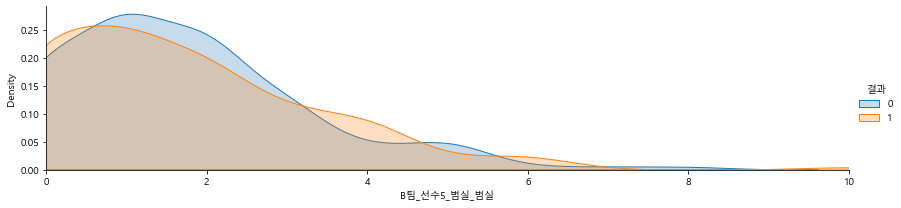

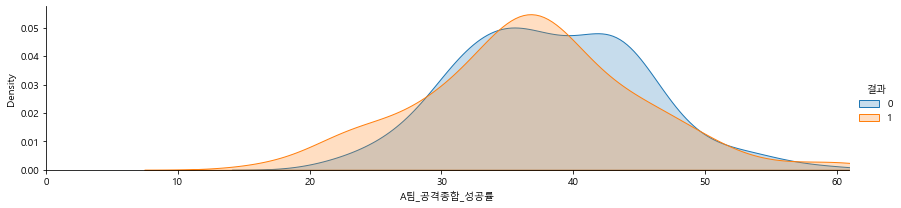

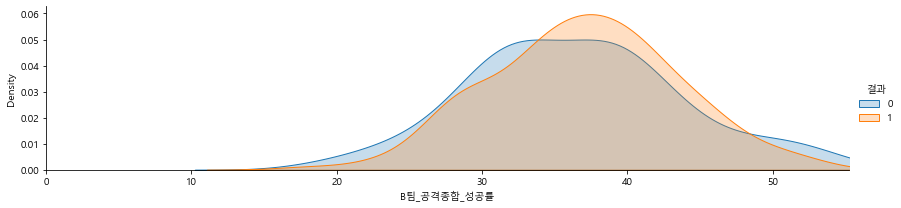

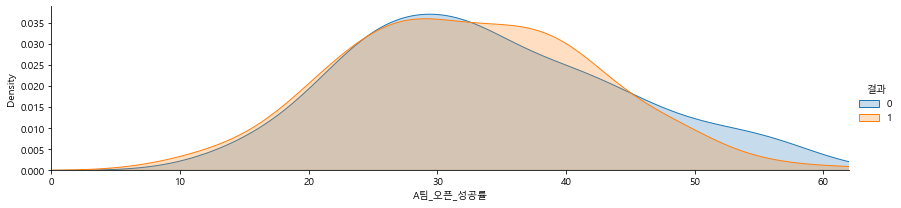

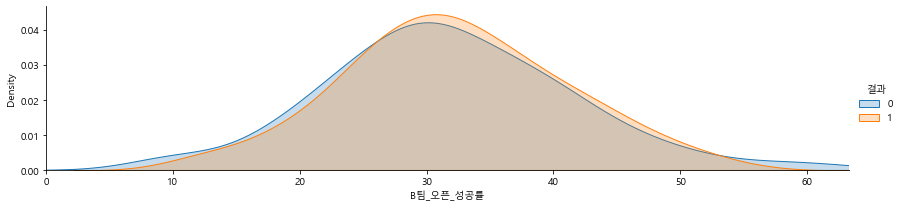

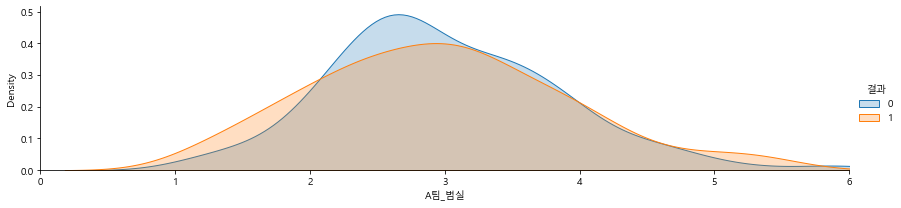

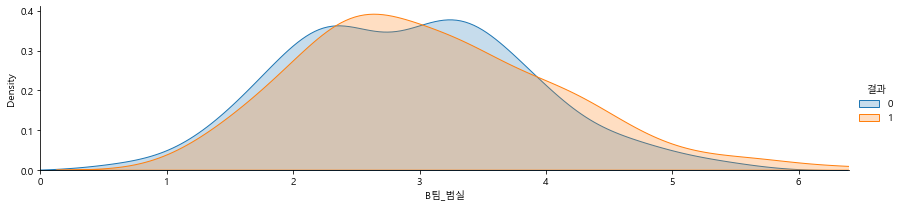

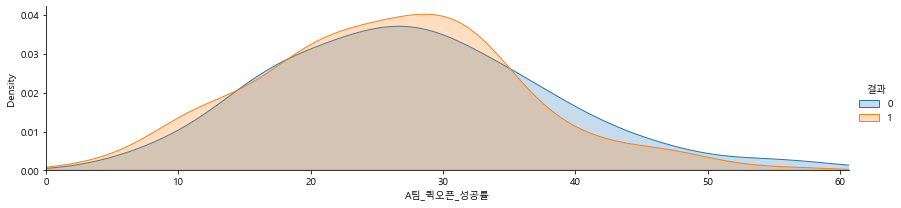

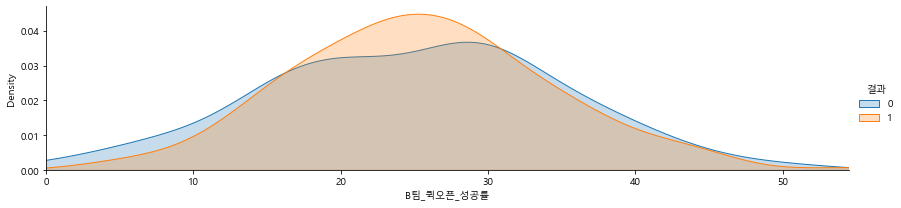

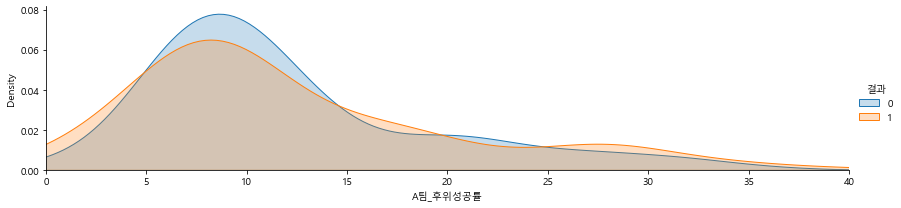

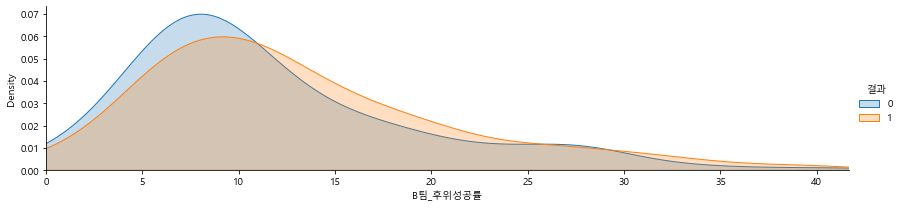

In [113]:
for i in range(90,len(data.columns)):
    facet = sns.FacetGrid(data, hue="결과",aspect=4)
    facet.map(sns.kdeplot,data.columns[i],shade= True)
    facet.set(xlim=(0, data[data.columns[i]].max()))
    facet.add_legend()
    plt.show()

# 모델 학습

In [44]:
SEED = 42

In [115]:
data

,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_시간차_성공률,A팀_선수1_이동_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_범실_범실,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_시간차_성공률,A팀_선수2_이동_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_범실_범실,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_시간차_성공률,A팀_선수3_이동_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_범실_범실,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_시간차_성공률,A팀_선수4_이동_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_범실_범실,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_시간차_성공률,A팀_선수5_이동_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_범실_범실,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_시간차_성공률,B팀_선수1_이동_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_범실_범실,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_시간차_성공률,B팀_선수2_이동_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_범실_범실,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_시간차_성공률,B팀_선수3_이동_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_범실_범실,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_시간차_성공률,B팀_선수4_이동_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_범실_범실,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_시간차_성공률,B팀_선수5_이동_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_범실_범실,A팀_공격종합_성공률,B팀_공격종합_성공률,A팀_오픈_성공률,B팀_오픈_성공률,A팀_범실,B팀_범실,A팀_퀵오픈_성공률,B팀_퀵오픈_성공률,A팀_후위성공률,B팀_후위성공률
3,1,29.85,26.83,100.00,0.0,8.33,0.0,45.45,0.20,7.0,27.78,20.00,44.44,0.0,0.00,0.0,50.00,0.20,6.0,30.00,12.00,0.0,0.0,0.00,0.00,60.00,0.6,6.0,25.00,0.00,50.0,25.0,0.0,16.67,0.00,0.20,3.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.20,2.0,41.46,36.00,60.00,0.0,50.00,0.0,40.00,0.20,8.0,43.48,33.33,23.08,0.0,0.00,85.71,0.00,0.40,5.0,44.19,35.29,33.33,0.00,50.0,0.00,53.85,0.2,5.0,30.77,0.00,50.00,0.00,0.0,33.33,0.00,0.00,1.0,27.03,30.00,20.0,0.0,0.0,0.00,27.27,0.00,6.0,22.526,37.386,11.766,26.924,4.8,5.0,31.090,24.224,1.666,20.000
5,0,43.66,34.21,33.33,0.0,58.82,0.0,53.85,0.00,3.0,33.33,30.00,16.67,0.0,33.33,100.0,50.00,0.40,4.0,23.68,13.04,50.0,0.0,0.00,0.00,41.67,0.6,2.0,25.00,28.57,0.0,0.0,0.0,50.00,0.00,0.00,2.0,50.00,66.67,0.0,57.14,0.0,50.00,0.0,0.00,4.0,50.00,53.85,0.00,0.0,0.00,0.0,40.00,0.60,9.0,34.69,33.33,0.00,0.0,33.33,0.00,36.84,0.00,1.0,42.86,25.00,50.00,50.00,0.0,57.14,0.00,0.0,3.0,45.45,16.67,42.86,50.00,0.0,83.33,0.00,0.20,3.0,50.00,50.00,0.0,0.0,0.0,0.00,0.00,0.20,1.0,35.134,44.600,34.498,35.770,3.0,3.4,29.104,15.368,18.430,6.666
6,1,35.29,42.86,25.00,0.0,37.50,0.0,18.18,0.00,6.0,44.68,29.41,100.00,0.0,50.00,0.0,52.38,0.60,7.0,37.78,28.57,50.0,0.0,50.00,0.00,45.00,0.4,2.0,50.00,100.00,0.0,0.0,0.0,33.33,0.00,0.40,1.0,100.00,0.00,0.0,0.00,0.0,100.00,0.0,0.00,0.0,37.50,24.24,50.00,0.0,38.71,0.0,100.00,0.40,6.0,30.56,21.43,33.33,0.0,0.00,0.00,38.89,0.20,5.0,33.33,25.00,0.00,0.00,0.0,50.00,0.00,0.0,2.0,43.75,33.33,0.00,0.00,0.0,50.00,0.00,0.00,5.0,17.39,18.18,0.0,0.0,0.0,0.00,18.18,0.00,2.0,53.550,32.506,40.168,24.436,3.2,4.0,23.112,31.414,27.500,7.742
7,0,54.93,43.24,0.00,0.0,77.78,0.0,40.00,0.00,8.0,28.00,31.25,0.00,0.0,0.00,0.0,25.00,0.25,5.0,25.00,16.67,100.0,0.0,0.00,22.22,0.00,0.0,3.0,40.00,40.00,0.0,0.0,0.0,0.00,0.00,0.00,1.0,60.00,0.00,100.0,0.00,0.0,62.50,0.0,0.00,2.0,42.86,50.00,0.00,0.0,33.33,0.0,33.33,0.60,7.0,37.84,42.11,0.00,0.0,0.00,0.00,37.50,0.40,3.0,35.00,0.00,50.00,33.33,0.0,37.50,0.00,0.0,3.0,29.41,25.00,0.00,0.00,0.0,50.00,0.00,0.00,1.0,10.00,20.00,0.0,0.0,0.0,0.00,0.00,0.20,7.0,41.586,31.022,26.232,27.422,3.8,4.2,13.000,14.166,15.556,6.666
8,1,39.02,29.41,0.00,0.0,56.25,0.0,33.33,0.33,5.0,32.43,38.89,100.00,0.0,0.00,0.0,28.57,0.00,9.0,28.57,15.00,0.0,0.0,33.33,0.00,44.44,0.5,5.0,60.00,100.00,0.0,0.0,0.0,50.00,0.00,0.25,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.33,0.0,50.00,50.00,0.00,0.0,46.15,0.0,60.00,0.20,5.0,35.48,31.82,100.00,0.0,0.00,0.00,42.86,0.20,2.0,41.18,30.00,58.82,0.00,25.0,0.00,0.00,0.6,3.0,42.86,50.00,0.00,100.00,0.0,40.00,0.00,0.20,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.0,32.004,33.904,36.660,32.364,3.8,2.2,21.268,20.572,17.916,

In [126]:
c_list = [
'A팀_선수1_공격종합_성공률',
'A팀_선수1_오픈_성공률',
'A팀_선수1_후위_성공률',
'A팀_선수1_퀵오픈_성공률',
'A팀_선수1_범실_범실',
'A팀_선수2_퀵오픈_성공률',
'A팀_선수2_범실_범실',
'A팀_선수4_후위_성공률',
'A팀_선수4_범실_범실',
'A팀_선수5_공격종합_성공률',
'A팀_선수5_오픈_성공률',
'A팀_선수5_범실_범실',
'B팀_선수1_공격종합_성공률',
'B팀_선수1_오픈_성공률',
'B팀_선수1_퀵오픈_성공률',
'B팀_선수1_범실_범실',
'B팀_선수1_후위_성공률',
'B팀_선수2_공격종합_성공률',
'B팀_선수2_후위_성공률',
'A팀_공격종합_성공률',
'B팀_공격종합_성공률',
'A팀_범실',  
'B팀_범실', 
'A팀_후위성공률',
'B팀_후위성공률',]

In [127]:
# 결과 열을 제외한 열은 X, 결과 열은 y에 저장
X = data.drop('결과', axis = 1)
y = data['결과']

In [128]:
X = X[c_list]

### 표준화

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 셔플없이

In [48]:
# 학습, 검증데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state= SEED, shuffle=False)

### 로지스틱

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgr = LogisticRegression(random_state=SEED)
lgr.fit(X_train, y_train)
train = lgr.predict(X_train)
pred = lgr.predict(X_test)

accuracy_score(train, y_train), accuracy_score(pred, y_test)

(0.8038461538461539, 0.5517241379310345)

### 의사결정트리

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10,min_samples_split=20,max_features=0.8, random_state = SEED)
tree.fit(X_train,y_train)

tree.score(X_train,y_train),tree.score(X_test,y_test)

(0.8615384615384616, 0.6206896551724138)

### 랜덤포레스트

In [51]:
from sklearn.ensemble import RandomForestClassifier


rfr = RandomForestClassifier(random_state = SEED, n_estimators = 1500, n_jobs = -1,
max_depth = 3, max_features = 0.1)
rfr.fit(X_train, y_train)
rfr.score(X_train,y_train), rfr.score(X_test, y_test)



(0.9423076923076923, 0.6206896551724138)

In [52]:
import pandas as pd

x=pd.DataFrame(list(zip(X.columns, rfr.feature_importances_)), 
               columns = ['feature', 'importances']).sort_values(by = 'importances', ascending = False)

x = x.head(10)
x


,feature,importances
82,B팀_선수5_오픈_성공률,0.038129
58,B팀_선수2_후위_성공률,0.037894
1,A팀_선수1_오픈_성공률,0.036655
4,A팀_선수1_후위_성공률,0.033807
15,A팀_선수2_퀵오픈_성공률,0.026909
0,A팀_선수1_공격종합_성공률,0.026332
63,B팀_선수3_공격종합_성공률,0.024097
17,A팀_선수2_범실_범실,0.023940
18,A팀_선수3_공격종합_성공률,0.023774
6,A팀_선수1_퀵오픈_성공률,0.023560


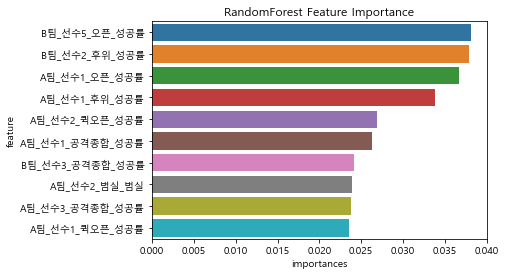

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y = 'feature', x = 'importances', data = x)
plt.title("RandomForest Feature Importance")
plt.show()

In [54]:
new_X =X[x['feature']]

scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(new_X)


X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, random_state= SEED, shuffle=False)

rfr1 = RandomForestClassifier(random_state=SEED, n_estimators = 400, max_features= 0.1, max_depth=5)
rfr1.fit(X1_train, y1_train)
rfr1.score(X1_train,y1_train) , rfr1.score(X1_test,y1_test)

(0.9230769230769231, 0.6436781609195402)

## xgbm

In [74]:
from xgboost import XGBClassifier

xgbm = XGBClassifier(random_state = SEED,
n_estimators = 100,
n_jobs = -1,
max_depth = 2,
learning_rate = 0.06)
xgbm.fit(X_train, y_train)
xgbm.score(X_train,y_train) , xgbm.score(X_test,y_test)

[22:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9153846153846154, 0.6436781609195402)

In [75]:
#컬럼 추출

In [76]:
f_i = pd.DataFrame(list(zip(X.columns,xgbm.feature_importances_)),columns=['feature','importance'])
f_i.sort_values(by='importance',ascending=False,inplace=True)
new_c = f_i.iloc[:10,] #상위 10개 칼럼만 하기
new_c = new_c['feature'].unique()
new_c = list(new_c)


In [77]:
a = f_i.iloc[:10,]

In [78]:
list(a['feature'])

['B팀_선수5_서브_성공률',
 'A팀_선수1_오픈_성공률',
 'B팀_선수2_후위_성공률',
 'B팀_선수3_퀵오픈_성공률',
 'A팀_선수4_오픈_성공률',
 'B팀_선수5_시간차_성공률',
 'B팀_선수5_오픈_성공률',
 'A팀_선수2_범실_범실',
 'A팀_선수3_오픈_성공률',
 'B팀_선수1_퀵오픈_성공률']

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
f_i.head(10)

,feature,importance
88,B팀_선수5_서브_성공률,0.043667
1,A팀_선수1_오픈_성공률,0.040267
58,B팀_선수2_후위_성공률,0.032326
69,B팀_선수3_퀵오픈_성공률,0.032251
28,A팀_선수4_오픈_성공률,0.028772
83,B팀_선수5_시간차_성공률,0.028498
82,B팀_선수5_오픈_성공률,0.026717
17,A팀_선수2_범실_범실,0.026638
19,A팀_선수3_오픈_성공률,0.025574
51,B팀_선수1_퀵오픈_성공률,0.025182


Text(0.5, 1.0, 'XGB Feature Importance')

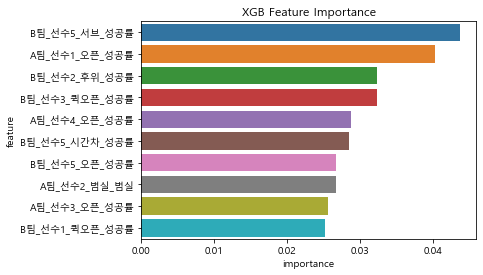

In [81]:
sns.barplot(y = 'feature', x = 'importance', data = f_i.head(10))
plt.title("XGB Feature Importance")

In [82]:
new_X = X[new_c]

scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(new_X)


X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, y, random_state= SEED, shuffle=False)


In [102]:
from xgboost import XGBClassifier

xgbm = XGBClassifier(random_state = SEED,
                     n_estimators = 110,
                     n_jobs = -1,
                     max_depth = 2,
                     learning_rate = 0.1)
xgbm.fit(X_train, y_train)
xgbm.score(X_train,y_train) , xgbm.score(X_test,y_test)

[22:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.8653846153846154, 0.5402298850574713)

###  LGBM

In [68]:
# 학습, 검증데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state= SEED, shuffle=False)

In [69]:
from lightgbm import LGBMRegressor, LGBMClassifier

lgbm = LGBMClassifier(random_state=SEED,
                     max_depth = 3, 
                     learning_rate = 0.03,
                     n_estimators=100)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm.score(X_train, y_train) , lgbm.score(X_test, y_test)


(0.9192307692307692, 0.6206896551724138)

Text(0.5, 1.0, 'LGBM Feature Importance')

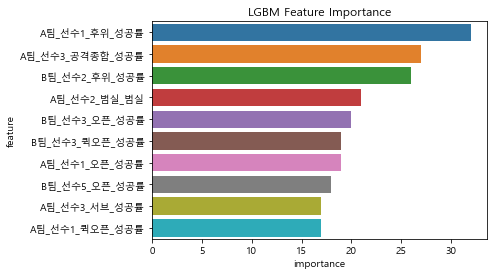

In [70]:
f_i = pd.DataFrame(list(zip(X.columns,lgbm.feature_importances_)),columns=['feature','importance'])
f_i.sort_values(by='importance',ascending=False,inplace=True)
new_c = f_i.iloc[:10,] #상위 10개 칼럼만 하기
new_c = new_c['feature'].unique()
new_c = list(new_c)

sns.barplot(y = 'feature', x = 'importance', data = f_i.head(10))
plt.title("LGBM Feature Importance")


In [71]:
f_i.head(10)

,feature,importance
4,A팀_선수1_후위_성공률,32
18,A팀_선수3_공격종합_성공률,27
58,B팀_선수2_후위_성공률,26
17,A팀_선수2_범실_범실,21
64,B팀_선수3_오픈_성공률,20
69,B팀_선수3_퀵오픈_성공률,19
1,A팀_선수1_오픈_성공률,19
82,B팀_선수5_오픈_성공률,18
25,A팀_선수3_서브_성공률,17
6,A팀_선수1_퀵오픈_성공률,17


 # LGBM2_수정필요

In [73]:
# lightgbm

from lightgbm import LGBMClassifier, LGBMRegressor
lgbm = LGBMClassifier(random_state=SEED, 
                      learning_rate=0.008,
                      n_estimators=400, 
                      subsample=0.7, 
                      max_depth=4, 
                      n_jobs = -1)
lgbm.fit(X_train, y_train)
lgbm.score(X_train, y_train), lgbm.score(X_test, y_test) # (0.9653846153846154, 0.5747126436781609)


(0.9615384615384616, 0.5632183908045977)

In [646]:
import pandas as pd
df_temp = pd.DataFrame(list(zip(data.columns, lgbm.feature_importances_)), 
                 columns=['feature', 'importances']).sort_values(by='importances', ascending=False)
df_temp.head(10)


,feature,importances
58,B팀_선수2_이동_성공률,147
4,A팀_선수1_이동_성공률,143
17,A팀_선수2_서브_성공률,118
6,A팀_선수1_속공_성공률,103
18,A팀_선수2_범실_범실,101
1,A팀_선수1_공격종합_성공률,92
82,B팀_선수5_공격종합_성공률,91
69,B팀_선수3_속공_성공률,88
64,B팀_선수3_공격종합_성공률,83
25,A팀_선수3_퀵오픈_성공률,76


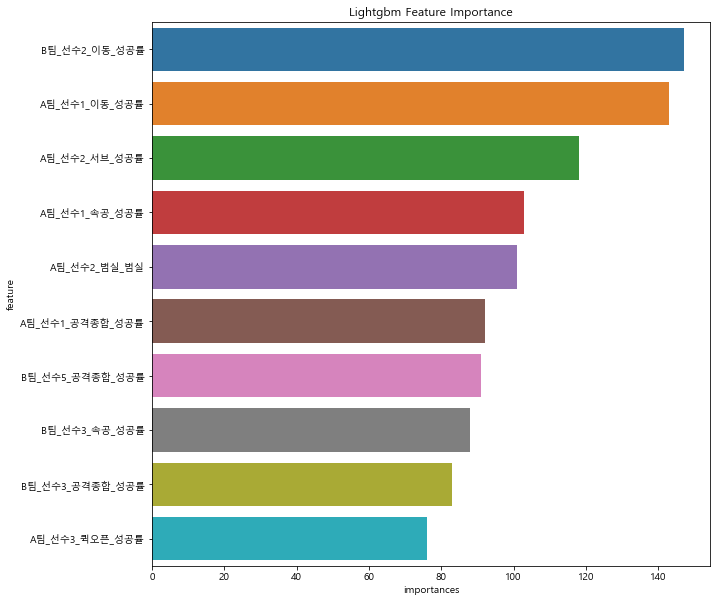

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(y='feature', x='importances', data=df_temp.head(10))
plt.title("Lightgbm Feature Importance")
plt.show()


In [648]:
df_top10 = df_temp.head(10)
df_top10  =X[df_top10['feature']]

scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(df_top10)

X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, y, random_state= SEED, shuffle=False)
lgbm = LGBMClassifier(random_state=SEED, learning_rate=0.008, n_estimators=400, subsample=0.7, max_depth=4, n_jobs = -1)
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test)) # 0.7961538461538461 0.6206896551724138

0.7961538461538461 0.6206896551724138
